The challenge is to recognize fraudulent credit card transactions so that the customers of credit card companies are not charged for items that they did not purchase.

Main challenges involved in credit card fraud detection are:

Enormous Data is processed every day and the model build must be fast enough to respond to the scam in time.
Imbalanced Data i.e most of the transactions (99.8%) are not fraudulent which makes it really hard for detecting the fraudulent ones
Data availability as the data is mostly private.
Misclassified Data can be another major issue, as not every fraudulent transaction is caught and reported.
Adaptive techniques used against the model by the scammers.
How to tackle these challenges?

The model used must be simple and fast enough to detect the anomaly and classify it as a fraudulent transaction as quickly as possible.
Imbalance can be dealt with by properly using some methods which we will talk about in the next paragraph
For protecting the privacy of the user the dimensionality of the data can be reduced.
A more trustworthy source must be taken which double-check the data, at least for training the model.
We can make the model simple and interpretable so that when the scammer adapts to it with just some tweaks we can have a new model up and running to deploy.

In [7]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


In [9]:
# Load the dataset from the csv file using pandas
# copy the path for the csv file
data = pd.read_csv("creditcard.csv")

In [10]:
# Grab a peek at the ata
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
# Print the shape of the data
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271

In [12]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced. Lets first apply our models without balancing it and if we don’t get a good accuracy then we can find a way to balance this dataset. But first, let’s implement the model without it and will balance the data only if needed.

In [13]:
#Print the amount details for Fraudulent Transaction
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
#Print the amount details for Valid Transaction
print('details of valid transaction')
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

As we can clearly notice from this, the average Money transaction for the fraudulent ones is more. This makes this problem crucial to deal with.

Code : Plotting the Correlation Matrix
The correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.

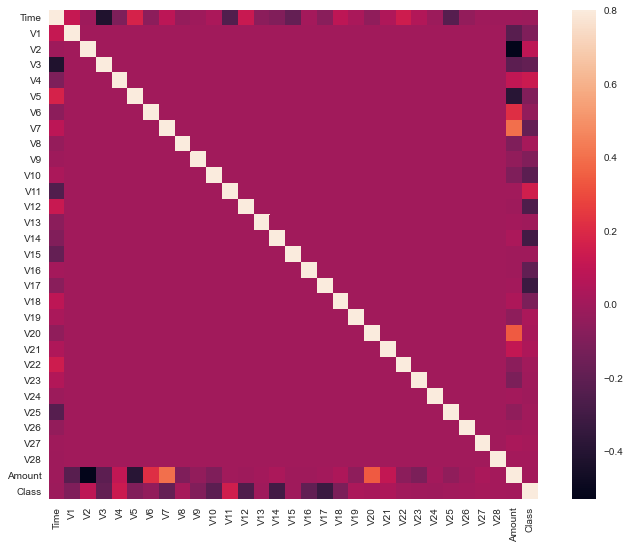

In [15]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

In [16]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(284807, 30)
(284807,)


Training and Testing Data Bifurcation
We will be dividing the dataset into two main groups. One for training the model and the other for Testing our trained model’s performance.

In [17]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
		xData, yData, test_size = 0.2, random_state = 42)

In [18]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [19]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9995962220427653
The precision is 0.9746835443037974
The recall is 0.7857142857142857
The F1-Score is 0.8700564971751412
The Matthews correlation coefficient is0.8749276812909632


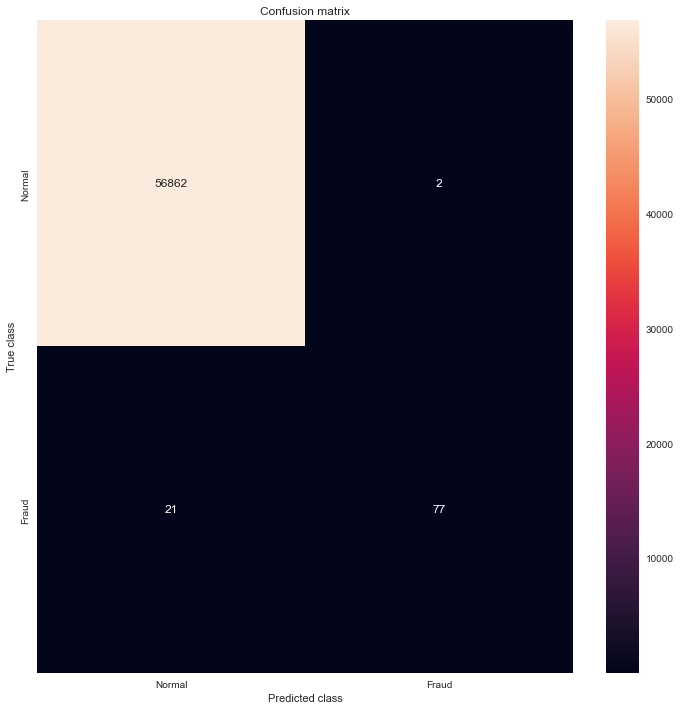

In [20]:
# visualising the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
			yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [21]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and
# copy the path for the csv file
path ="creditcard.csv"
data = pd.read_csv(path)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
# checking for the imbalance
len(data[data['Class']== 0])
len(data[data['Class']== 1])

492

In [23]:
conda install -c conda-forge pycaret

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.14.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/shivajulakanti/opt/anaconda3

  added / updated specs:
    - pycaret


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    alembic-1.8.1              |     pyhd8ed1ab_0         137 KB  conda-forge
    appdirs-1.4.4              |     pyh9f0ad1d_0          13 KB  conda-forge
    boruta_py-0.3              |             py_0          51 KB  conda-forge
    catalogue-1.0.0            |   py38h50d1736_3          13 KB  conda-forge
    chart-studio-1.1

alembic-1.8.1        | 137 KB    | ##################################### | 100% 
colorlover-0.3.0     | 12 KB     | ##################################### | 100% 
python_abi-3.8       | 4 KB      | ##################################### | 100% 
spacy-2.3.2          | 7.8 MB    | ##################################### | 100% 
python-cufflinks-0.1 | 59 KB     | ##################################### | 100% 
kmodes-0.12.2        | 20 KB     | ##################################### | 100% 
missingno-0.4.2      | 12 KB     | ##################################### | 100% 
srsly-1.0.2          | 196 KB    | ##################################### | 100% 
funcy-1.17           | 30 KB     | ##################################### | 100% 
imbalanced-learn-0.7 | 97 KB     | ##################################### | 100% 
sqlparse-0.4.2       | 34 KB     | ##################################### | 100% 
gitpython-3.1.27     | 123 KB    | ##################################### | 100% 
databricks-cli-0.12. | 56 KB

In [23]:
# Importing module and initializing setup

from pycaret.classification import *

In [24]:
clf1 = setup(data = data, target = 'Class', fold_shuffle=True, session_id = 2, imputation_type='iterative')

,Description,Value
0,session_id,2
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(284807, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


After this, a confirmation will be required to proceed. Press Enter for moving forward with the code.
Check if all the parameters type is correctly identified by the library.
Tell the classifier the percentage of training and validation split is to be taken. I took 80% training data which is quite common in machine learning.

Coming to the next cell, this is the most important feature of the library. It allows the training data to be fit and compare to all the algorithms in the library to choose the best one. It displays which model is best and in what evaluation matrix. When the data is imbalance accuracy not always tell you the real story. I checked the precision but AUC, F1 and Kappa score can also be of great help to analyze the models. But this is going to an article amongst itself.

In [25]:
best_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9995,0.9537,0.7625,0.9612,0.8482,0.8479,0.8547,20.2470
et,Extra Trees Classifier,0.9995,0.9536,0.7625,0.9514,0.8439,0.8436,0.8501,2.3460
lda,Linear Discriminant Analysis,0.9994,0.8964,0.7595,0.8694,0.8076,0.8073,0.8107,0.2970
ada,Ada Boost Classifier,0.9992,0.9718,0.6840,0.8182,0.7413,0.7409,0.7458,8.0100
lr,Logistic Regression,0.9991,0.9424,0.6283,0.8475,0.7169,0.7165,0.7269,1.4920
dt,Decision Tree Classifier,0.9990,0.8753,0.7512,0.7105,0.7281,0.7276,0.7290,2.7060
gbc,Gradient Boosting Classifier,0.9990,0.7102,0.5479,0.8180,0.6511,0.6506,0.6662,39.9350
ridge,Ridge Classifier,0.9988,0.0000,0.3992,0.8335,0.5335,0.5330,0.5726,0.0730
knn,K Neighbors Classifier,0.9983,0.5977,0.0529,0.7500,0.0980,0.0978,0.1952,0.4660
dummy,Dummy Classifier,0.9982,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0560


In [28]:
# creating random forest model
ET = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9998,0.9857,0.8889,1.0000,0.9412,0.9411,0.9427
1,0.9994,0.9567,0.8056,0.8529,0.8286,0.8283,0.8286
2,0.9997,0.9573,0.8611,0.9688,0.9118,0.9116,0.9132
3,0.9994,0.9992,0.7500,0.9310,0.8308,0.8305,0.8354
4,0.9995,0.9844,0.7429,1.0000,0.8525,0.8522,0.8617
5,0.9995,0.9268,0.7429,0.9630,0.8387,0.8385,0.8456
6,0.9995,0.9141,0.7222,1.0000,0.8387,0.8385,0.8496
7,0.9993,0.9284,0.7222,0.8966,0.8000,0.7997,0.8044
8,0.9994,0.9561,0.6944,1.0000,0.8197,0.8194,0.8331


Displaying model parameters

In [33]:
ET

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

Evaluating the best model from all the models above

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<Figure size 576x396 with 0 Axes>

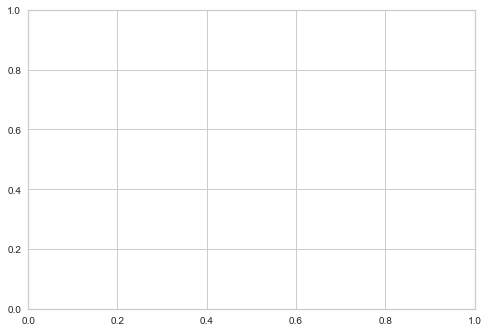

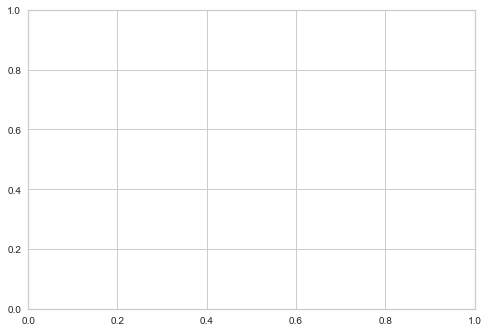

In [29]:
evaluate_model(best_models)